# Business Prototyping Toolkit for Python (and Jupyter Notebooks)
The Business Prototyping Toolkit for Python comes with a model simulator, a tool for defining scenarios (Jupyter Notebook - TODO!) and some methods to plot simulation results, a so-called API.

The API for plotting simulation is really simple. It only exposes some methods that generate plots. The simulations run in the background every time you call a plot method. For long and large simulations, pleas bear with me and bring a few seconds of patience before I plot. ;-)
All simulation scenarios have to be in the ``scenarios/`` folder. BPTK_Py will scan and load them - including the models - into python. Each API method comes with many parameters for modifying the graph. The standard settings however are in my config. They define the common "transentis" style.

Usually you only need the ``scenario_name`` (methods for one scenario)/ ``scenario_names`` (methods for a list of scenarios) and ``equation``/``equations`` parameters to get a working example. Of course you will probably want to define a title and labels for the x and y axis. Just look at the example method calls given to get a feel for the optional parameters.

Please run the following lines to import the API to your notebook and ignore the warnings (if any). You run a line by pushing ``Shift + Enter``
You will also get an overview over the available scenario managers and scenarios.

**Please** note the line ``config.configuration["sd_py_compiler_root"] = "~/Code/sd-compiler/"``: Change the path according to your file structure. It has to contain the path to the git repo of "sd_compiler"!

In [2]:
import BPTK_Py.config.config as config
# C:\Users\dominik\Code\sd-compiler
config.configuration["sd_py_compiler_root"] = "~/Code/sd-compiler/"  ## <--- Please change this path to the git repo of the sd_compiler package!

## For Windows PC's, please use \\ for seperating folders and add additional " ":
#config.configuration["sd_py_compilter_root"] = "\"C:\\Users\\Henrique Beck\\Code\\sd-compiler\""

## BPTK Package
from BPTK_Py.bptk import bptk 
#from BPTK_Py.scenariomanager.scenario_manager import scenarioManager

bptk = bptk()
#scenarioManager = bptk.ScenarioManager
print("Available Scenario Managers and Scenarios:")
print()
managers = bptk.scenario_manager_factory.get_scenario_managers(scenario_managers_to_filter=[])

for key, manager in managers.items():
     print("")
     print("*** {} ***".format(key))

     for name in manager.get_scenario_names():
         print("\t {}".format(name))




Available Scenario Managers and Scenarios:


*** ScenarioManager1 ***
	 MakeYourStartUpGrow
	 MakeYourStartUpGrow_2
	 MakeYourStartUpGrow_strategy

*** ScenarioManager2 ***
	 MakeYourStartUpGrow-x
	 MakeYourStartUpGrow_jh2
	 MakeYourStartUpGrow_strategy


## Example 1: Multiple Equations for one scenario
Here we assume that we would like to simulate multiple equations for one scenario.
The ``bptk.plotOutputsForScenario`` method helps us plotting this simulation. We simulate the equations 'cashFlow.cashFlowYtd' and 'cash.cash' for the scenario "MakeYourStartUpGrow". Play around with the parameters for the x/y labels and title.

You may either use the ``scenario_managers`` parameter and supply a list of all scenario Managers (by name) you want to plot the simulation results for. Or you use the specific ``scenario_name``. You may of course as well use both if you have duplicate names (one name in multiple scenario managers).

In [ ]:

bptk.plot_outputs_for_scenario(
    scenario_managers=["ScenarioManager1","ScenarioManager2"],
    scenario_name="MakeYourStartUpGrow_strategy",
    equations=['cashFlow.cashFlowYtd','cash.cash'],
    title="Multiple Equations for one Scenario\n",
    x_label="Time",
    y_label="S0m3 Number",
)


### Play with start date and frequency
In the above example, we did not specify the ``freq`` and ``start_date`` parameters. So the series starts at Jan, 1st 2018 and assumes daily values. But what if we want to change this? Let us set ``freq="M"``and ``start_date="1/11/2017"``.
Of course, the graph is the same. But the y-axis changed. Now the plot assumes monthly data, starting at Nov, 1, 2017!

In [ ]:
bptk.plot_outputs_for_scenario(
    scenario_name="MakeYourStartUpGrow_strategy", 
    freq="M", 
    start_date="1/11/2017",
    equations=['cashFlow.cashFlowYtd','cash.cash'],
    stacked=False,
    title="Multiple Equations for one Scenario\n",
    x_label="Time",y_label="S0m3 Number"
)

### Naming the series
The equation names are not the kind of names we want to show the customer. So let use the ``series_name`` parameter to rename them. Supply a list of names. The order follows the order of the equations in the ``equations`` parameter!
Use Python's list notation: ``[ ]``. Without this parameter, BPTK will just use the equation and scenario names. If you have 3 equations and only specify one value in the list, will only modify the name of the first series. 

You may also use an empty string in the list to change the name of the second (or third..) series: ``[ "", "nameToChangeTo" ]`` 

In [ ]:
bptk.plot_outputs_for_scenario(
    scenario_name="MakeYourStartUpGrow", 
    freq="M", 
    start_date="1/11/2017",
    equations=['cashFlow.cashFlowYtd','cash.cash'],
    stacked=False,
    title="Multiple Equations for one Scenario\n",
    x_label="Time",
    y_label="S0m3 Number",
    series_names=["Cashflow","Cash"]
)

## Example 2: Plot one equation for multiple scenarios
Now let us change the perspective. In the above example we assumed one scenario for which we simulate multiple equations. Now we simulate **one equation for multiple scenarios**.
The parameters stay the same and you can play around with them just as you could above. The method is: ``bptk.plotScenarioForOutput``.

In [ ]:
bptk.plot_scenario_for_output(
    scenario_names=["MakeYourStartUpGrow_2","MakeYourStartUpGrow"],
    equation="cashFlow.cashFlowYtd",
    stacked=False, 
    freq="M", 
    start_date="1/11/2017",
    title="One Equation for multiple Scenarios",
    x_label="Time",
    y_label="Dollars",
    series_names=["CashFlow1","CashFlow2"]
)

## What if I want another kind of graph?
Well, there is the ``kind`` parameter! Let us see what happens if we set ``kind="line"``!

The documentation 


In [ ]:
bptk.plot_scenario_for_output(
    scenario_names=["MakeYourStartUpGrow_2","MakeYourStartUpGrow"],
    kind="line",equation="cashFlow.cashFlowYtd",
    stacked=False, 
    freq="D", 
    start_date="1/11/2017",
    title="One Equation for multiple Scenarios \n Line Graph",
    x_label="Time",
    y_label="Number",
    series_names=["CashFlow1","CashFlow2"]
)

## Strategies

The simulator is also able to simulate various strategies. A strategy defines which constants change at which point in time of the simulation. For defining a strategy, use the ``strategy`` key in your scenario definition and give (key,value) sets for the constants you'd like to change. Note that the ``constants`` field in the strategy will also be parsed at ``t=0`` for initial modifications of the strategies.
```
  "strategy": {
    "1": {
      "cost.paymentTransactionCost": 0.4,
      "customers.marketingBudget": 5000
    },
    "2": {
      "cost.paymentTransactionCost": 0.8,
      "customers.marketingBudget": 10000
    },
    "50": {
      "cost.paymentTransactionCost": 0.65,
      "customers.marketingBudget": 0
    },
    "76": {
      "cost.paymentTransactionCost": 0.7,
      "customers.marketingBudget": 2000
    },
    "100": {
      "cost.paymentTransactionCost": 0.99,
      "customers.marketingBudget": 99000
    }
  }
```
This strategy modifies the constants ``cost.paymentTransactionCost`` and ``customers.marketingBudget`` at time steps 1, 2, 50 and 76. The full scenario for this strategy is available in [scenarios/make_your_startup_grow_with_strategy.json)](scenarios/make_your_startup_grow_with_strategy.json).
To apply a strategy for a scenario, use the parameter ``strategy=True``. The following plot executes the model with the strategy and shows how the marketing budget follows the configuration the strategy.

**Note:** If you set the ``strategy=True`` but there is not strategy defined in the scenario, the simulator will just issue a Warning in the logfile and execute the simulation(s) without a strategy. 

The following example shows what happens when using the strategy as compared to the scenario without strategy:

In [ ]:
bptk.plot_scenario_for_output(
    scenario_managers=["ScenarioManager1"],
    scenario_names=["MakeYourStartUpGrow","MakeYourStartUpGrow_strategy"], 
    equation="customers.marketingBudget",
    title="Marketing Budget with and without strategy\n",
    x_label="Time",
    y_label="Marketing Budget (USD)",
    strategy=True
)


### Example 2: Effects of strategies on complex equations
Let us now see what happens when we use a more complex example. Therefore, we simply use the approach we have been using before: Define the scenarios and the equation you would like to plot, and execute the line of code using ``bptk.plotScenarioForOutput`` (One equation, multiple scenarios).

In [ ]:
bptk.plot_scenario_for_output(scenario_names=["MakeYourStartUpGrow","MakeYourStartUpGrow_strategy"],
                              scenario_managers=["ScenarioManager1"],
                           series_names=["Cashflow without strategy", "Cashflow with strategy"], 
                           start_date="2017-01-01",
                           freq="M", 
                           equation='cashFlow.cashFlowYtd',#'cashFlow.cashFlowYtd',
                           title="Cashflow with and without strategy\n",
                           x_label="Time",y_label="Cashflow (USD)",strategy=True
                          )

## Advanced: Extended Strategies / Manipulation during runtime
Now it gets really interesting and rather complex. The goal is to replace certain equations of the model with custom lambda functions during runtime. This is for advanced use only and currently considered unstable.

First we need to obtain the scenarios and their corresponding simulation models and replace the given equations with the new lambda. 
An extended strategy is just another dictionary. In general, it looks like this:
```
scenarios = bptk.ScenarioManager.getAvailableScenarios()

extended_strategy= {
    "MakeYourStartUpGrow_strategy" : {
        1 : { 
            "cashFlow.cashFlowYtd" : lambda t : 85000 if t<= 1 else scenarios["MakeYourStartUpGrow_strategy"].model.memoize("cashFlow.cashFlowYtd",t-1),
            "cash.cash" : lambda t : 8000000 if t <= scenarios["MakeYourStartUpGrow_strategy"].model.starttime else scenarios["MakeYourStartUpGrow_strategy"].model.memoize("cash.cash",t-1)+ 80000,
        },
        75 : {
            "cash.cash" : lambda t : 0
        }
    }    
}
```
You see that this concept is rather complex and requires understanding of Python. First we have to load all available scenarios. The dictionary contains *pointers* to the specific scenario objects that we loaded from the scenario files. They are stored in the ``ScenarioManager`` object instance of the ``bptk`` object. The lambda functions now have to use these pointers to receive the pointers to the ``model`` object (and therefore the equations) of the simulation model. 
We will overwrite the specific equations with the given lambda function(s) in the previously-described strategy dictionary of the scenario. It is possible to store lambda functions just like this as strings in JSON **but** the complexity is even higher when it comes to adding it to the model during run-time. As the bptk object uses the same set of scenarios, it will use the same object pointers when we finally issue ``bptk.plotOutputsForScenario(... ,strategy=True)``

We begin with defining the new, extended strategy. It plays a around with the equations ``cashFlow.cashFlowYtd`` and ``cash.cash``. Look at ``cash.cash``. It will return 80,000 if at starttime of the model. Otherwise, it return the value of t-1 + 80,000. Instead, we might even use the model's ``dt``: ``scenarios["MakeYourStartUpGrow_strategy"].model.dt`` instead of -1. But this would make the code line too complex. Make sure to use dt however, if you intend to work in productive mode!


In [3]:
scenarios = bptk.scenario_manager_factory.get_scenarios(scenario_managers=["ScenarioManager1"])


extended_strategy= {
    "MakeYourStartUpGrow_strategy" : {
        1 : { 
            "cashFlow.cashFlowYtd" : lambda t : 85000 if t<= 1 else scenarios["MakeYourStartUpGrow_strategy"].model.memoize("cashFlow.cashFlowYtd",t-1),
            "cash.cash" : lambda t : 8000000 if t <= scenarios["MakeYourStartUpGrow_strategy"].model.starttime else scenarios["MakeYourStartUpGrow_strategy"].model.memoize("cash.cash",t-1)+ 80000,
        },
        75 : {
            "cash.cash" : lambda t : 85000
        }
    }    
}


And now we run the method ``bptk.modify_strategy_for_complex_strategy(scenarios,extended_strategy)``. It receives the pointers to the scenarios object and the modifications to the existing strategy. The method will just take the dictionary and fill up the strategy field of the scenario(s) with the lambda function objects.

Please keep in mind that ``bptk`` will not store the old lambda function. It runs the simulation until ``t-1``, inserts the new function and continues until the next change. If you want to re-run the scenario with another modified strategy, just flush the ``ScenarioManager``'s ``scenario`` object:
```
bptk.ScenarioManager.scenarios = {}
```
This will cause the scenario manager to reload the scenario's simulation model from the source file.
Finally, you may use the plotting methods with the ``strategy=True`` parameter for simulating and plotting the modified scenarios. 

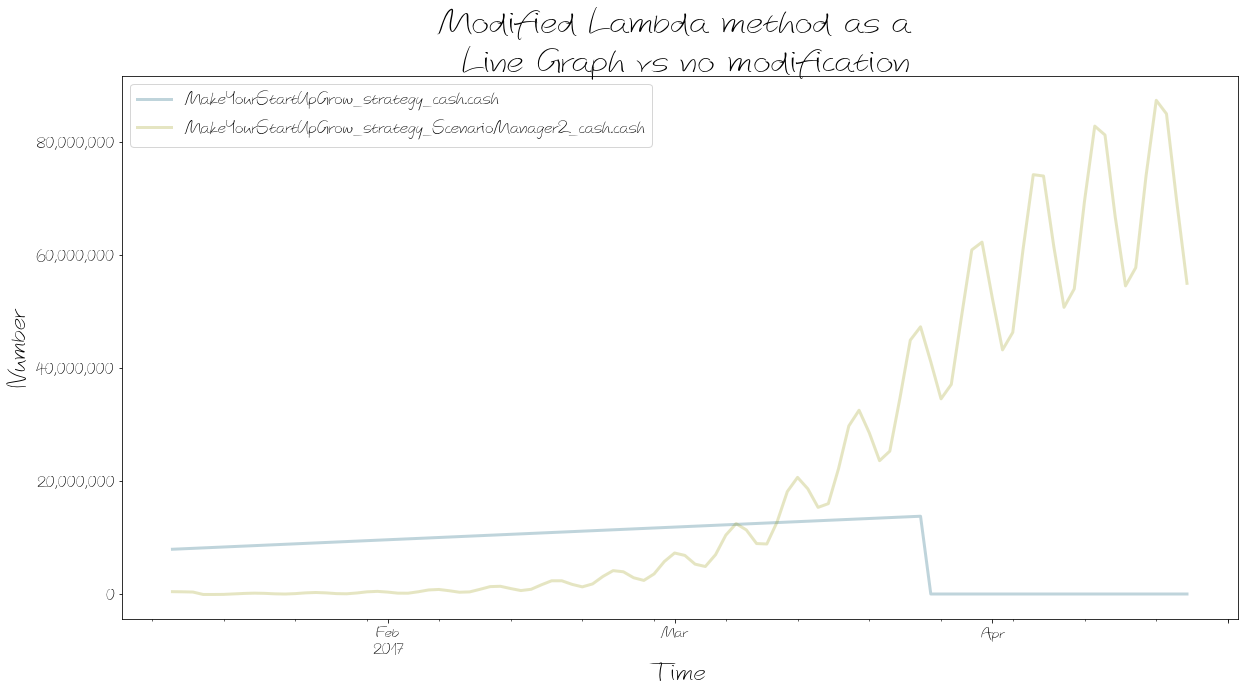

In [4]:
## For each scenario in the extended strategy (top-level key) do:
bptk.modify_strategy_for_complex_strategy(scenarios=scenarios,extended_strategy=extended_strategy)

## Plot the graph with the extended stratefy
bptk.plot_scenario_for_output(
    scenario_managers=[],
    
    scenario_names=["MakeYourStartUpGrow_strategy"],
    kind="line",
    equation="cash.cash",
    stacked=False, 
    strategy=True,
    freq="D", 
    start_date="1/11/2017",
    title="Modified Lambda method as a \n Line Graph vs no modification",
    x_label="Time",
    y_label="Number",
)

# Create Scenarios during Runtime
It is possible to add scenarios during runtime. For convenience, here is some example code you may use as a template to generate your own scenarios during runtime. If you define multiple scenarios for the same ``scenario_manager``, this is no problem. 

First define the details for the scenario manager and then set up the name of the scenario, the strategy and the constants. The strategy may as well be one of the complex ones as described above. But be careful to define everything correctly.

In [ ]:
from BPTK_Py.scenariomanager.scenario import simulationScenario

scenario_manager = {
    "name" : "ScenarioManager2",
    "model" : "simulation_models/model",
    "source" : "simulation_models/make_your_startup_grow.itmx"
}


name = "TESTME"
strategy = {
            "10": {
                "cost.paymentTransactionCost": 0.4,
                "customers.marketingBudget": 10000
            } 
}
constants = {
            "cost.paymentTransactionCost": 0.75,
            "cost.productDevelopmentWage": lambda t : 80000 * t
        }


dictionary = {"name" : name, "constants" : constants, "strategy" : strategy}

scenario = simulationScenario(filename=None,name=name,group=scenario_manager["name"],dictionary=dictionary,model_name=scenario_manager["model"])

bptk.scenario_manager_factory.add_scenario_during_runtime(scenario,scenario_manager=scenario_manager["name"],source=scenario_manager["source"],model=scenario_manager["model"])


In [ ]:
bptk.plot_scenario_for_output(
    scenario_managers=[],
    scenario_names=['TESTME'],
    kind="line",
    equation="cost.productDevelopmentWage",
    stacked=False, 
    strategy=True,
    freq="D", 
    start_date="1/11/2017",
    title="Added scenario during runtime",
    x_label="Time",
    y_label="Number",
)